# The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

In [1]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x1fbf0de5c10>)

There are 6 star types that are encoded in the 'Star type' column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

In [20]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()     # Converts categories <---> numbers 
# Assign unique integers from 0 to 5 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])     # Substitute the 'Star Type' dataframe column with integer labels
labels = le.inverse_transform(df_stars['Star type'])     # Gets back the names of the star types
class_names = le.classes_     # Unique categories
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


We've seen this already last time. It is often good practice to start with a statistical analysis of the dataset to answer the following questions:

- Are there any missing values?
- Are there NaNs in the data?

Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:

<center>
    <img src="https://github.com/Alice-Palladino/astrostatistics_bicocca_2024/blob/main/working/HR_diagram.png?raw=true" alt="HR diagram" width="500">
</center>

We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

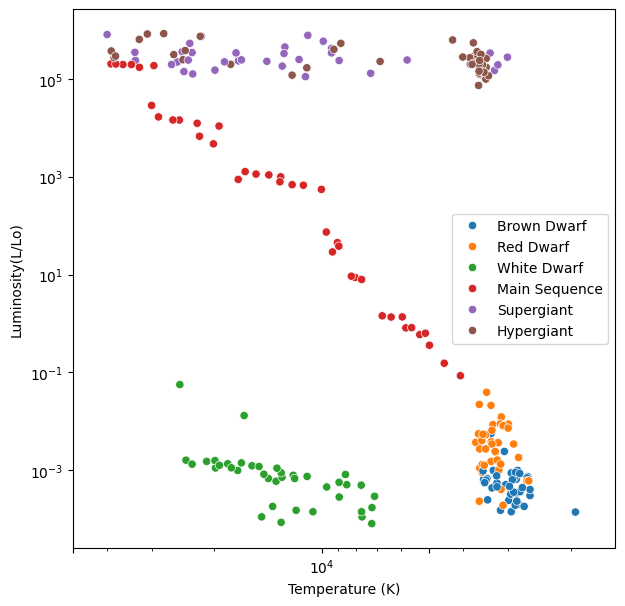

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

## Tasks

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two.
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

This is actually a very important lesson in machine learning: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is the usual machine-learning approach) standardize your data such that each dimension has mean=0 and variance=1.
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?

### For later:

- Now run a supervised classification algorithm on this dataset.
- Can you predict the stellar type? How well? Careful with overfitting of course.

## PCA with original dataset

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.ticker import PercentFormatter

In [22]:
X = df_stars.to_numpy()

temperature = np.array(X[:, 0], dtype = float)
luminosity = np.array(X[:, 1], dtype = float)
radius = np.array(X[:, 2], dtype = float)
magnitude = np.array(X[:, 3], dtype = float)

data = np.column_stack((temperature, luminosity, radius, magnitude))

Let's start by reducing the dataset from $4$ to $2$ dimensions:

In [7]:
pca = PCA(n_components=2, random_state = 336)
components = pca.fit_transform(data)

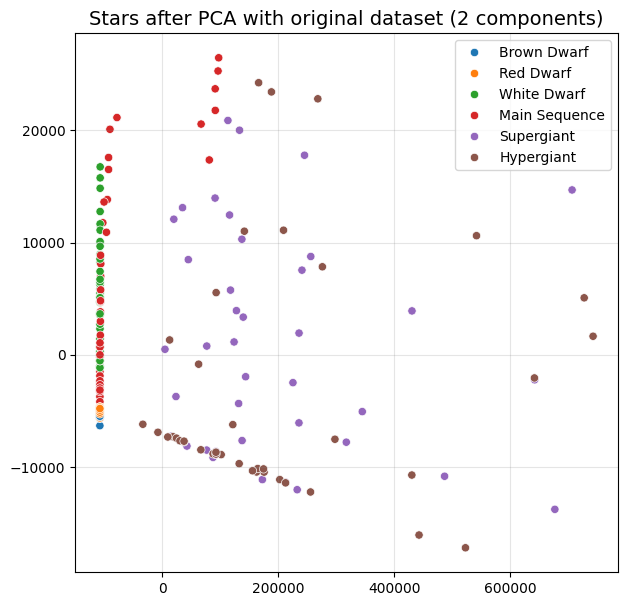

In [8]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=labels)
plt.title('Stars after PCA with original dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

As expected, this first plot is terrible: we need to scale the dataset first.

## PCA with transformed set

First, we use a linear transformation, so that every dimension goes from $-1$ to $1$.

In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2, random_state = 336)
scaled_components = pca.fit_transform(scaled_data) 

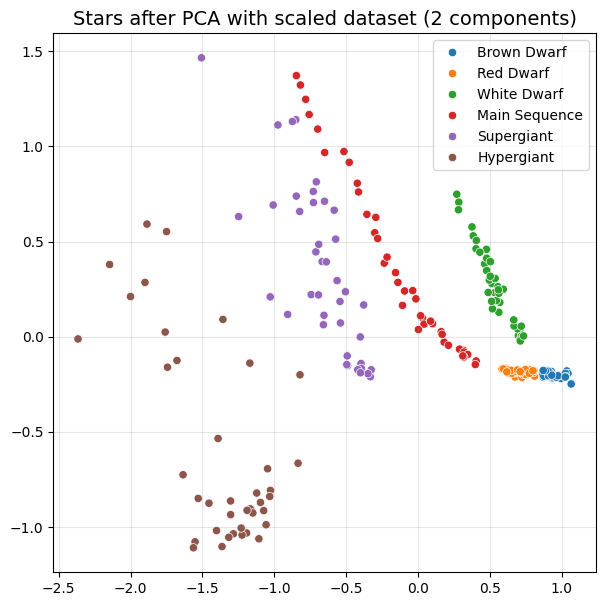

In [10]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = scaled_components[:,0], y = scaled_components[:,1], hue=labels)
plt.title('Stars after PCA with scaled dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

This is much better! Each type is well isolated from the others; dwarf stars are particularly well-clustered, while super- and hypergiants are more scattered, but still not mixed with other stars.

We want to know how much variance is encapsulated in each eigenvalue:

In [11]:
evals_scaled = pca.explained_variance_ratio_ 
for i, v in enumerate(evals_scaled):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_scaled)[i]*100))

In the 1° eigenvalue is encapsulated 63.8% of the variance (cumulative variance: 63.8%)
In the 2° eigenvalue is encapsulated 21.4% of the variance (cumulative variance: 85.2%)


Let's check the variance of 4 components instead:

In the 1° eigenvalue is encapsulated 63.8% of the variance (cumulative variance: 63.8%)
In the 2° eigenvalue is encapsulated 21.4% of the variance (cumulative variance: 85.2%)
In the 3° eigenvalue is encapsulated 8.4% of the variance (cumulative variance: 93.6%)
In the 4° eigenvalue is encapsulated 6.4% of the variance (cumulative variance: 100.0%)


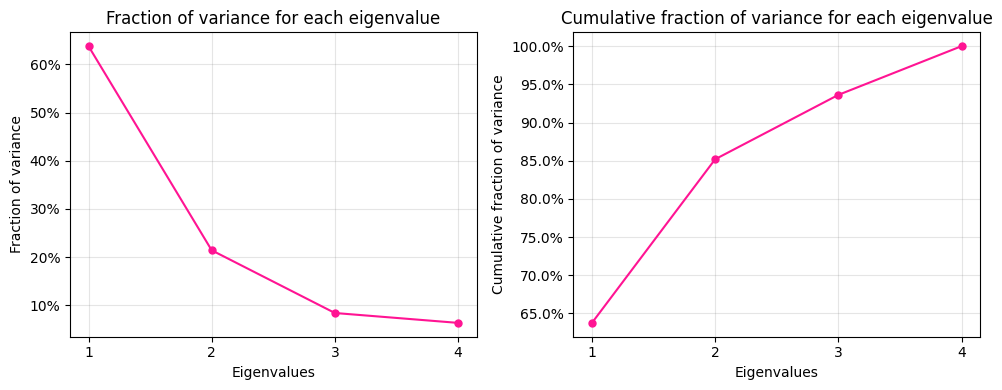

In [12]:
pca = PCA(n_components=4, random_state = 336)
scaled_components = pca.fit_transform(scaled_data) 
evals_scaled = pca.explained_variance_ratio_ 

for i, v in enumerate(evals_scaled):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_scaled)[i]*100))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
xgrid = np.arange(1, 5)

ax[0].plot(xgrid, evals_scaled, marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[0].grid(c='grey', alpha = 0.2)
ax[0].set_xlabel('Eigenvalues')
ax[0].set_xticks(xgrid)
ax[0].set_ylabel('Fraction of variance')
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[0].set_title('Fraction of variance for each eigenvalue')

ax[1].plot(xgrid, np.cumsum(evals_scaled), marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[1].grid(c='grey', alpha = 0.2)
ax[1].set_xlabel('Eigenvalues')
ax[1].set_xticks(xgrid)
ax[1].set_ylabel('Cumulative fraction of variance')
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].set_title('Cumulative fraction of variance for each eigenvalue')

plt.tight_layout()
plt.show()

## PCA with standardized set

Now we try to standardize the dataset to see if the results are much different.

In [13]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

pca = PCA(n_components=2, random_state = 336)
std_components = pca.fit_transform(std_data)

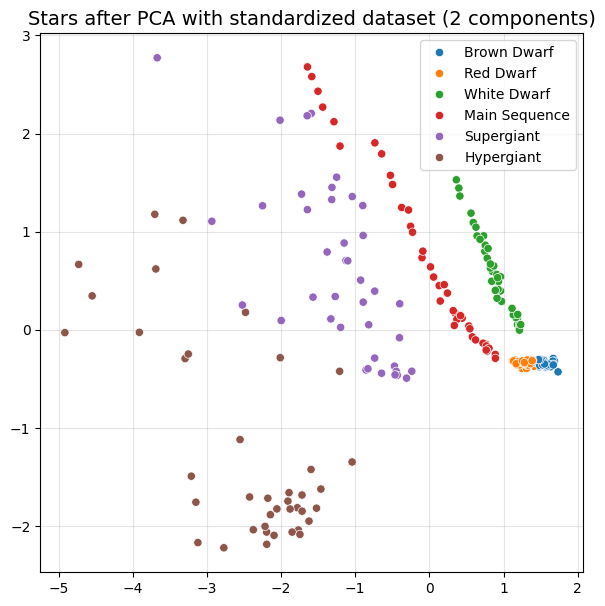

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = std_components[:,0], y = std_components[:,1], hue=labels)
plt.title('Stars after PCA with standardized dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

In [15]:
evals_std = pca.explained_variance_ratio_ 
for i, v in enumerate(evals_std):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_std)[i]*100))

In the 1° eigenvalue is encapsulated 60.4% of the variance (cumulative variance: 60.4%)
In the 2° eigenvalue is encapsulated 23.5% of the variance (cumulative variance: 83.9%)


It looks very similar to the scaled pca. 

With 4 components:

In the 1° eigenvalue is encapsulated 60.4% of the variance (cumulative variance: 60.4%)
In the 2° eigenvalue is encapsulated 23.5% of the variance (cumulative variance: 83.9%)
In the 3° eigenvalue is encapsulated 9.3% of the variance (cumulative variance: 93.2%)
In the 4° eigenvalue is encapsulated 6.8% of the variance (cumulative variance: 100.0%)


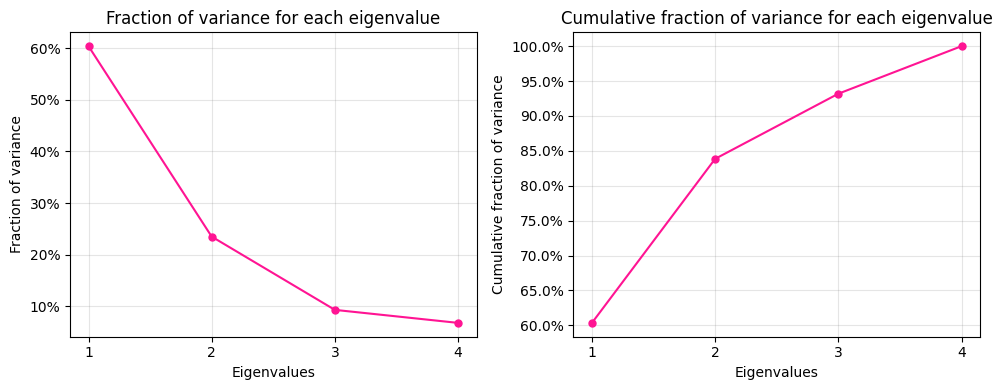

In [16]:
pca = PCA(n_components=4, random_state = 336)
std_components = pca.fit_transform(std_data) 
evals_std = pca.explained_variance_ratio_ 

for i, v in enumerate(evals_std):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_std)[i]*100))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
xgrid = np.arange(1, 5)

ax[0].plot(xgrid, evals_std, marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[0].grid(c='grey', alpha = 0.2)
ax[0].set_xlabel('Eigenvalues')
ax[0].set_xticks(xgrid)
ax[0].set_ylabel('Fraction of variance')
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[0].set_title('Fraction of variance for each eigenvalue')

ax[1].plot(xgrid, np.cumsum(evals_std), marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[1].grid(c='grey', alpha = 0.2)
ax[1].set_xlabel('Eigenvalues')
ax[1].set_xticks(xgrid)
ax[1].set_ylabel('Cumulative fraction of variance')
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].set_title('Cumulative fraction of variance for each eigenvalue')

plt.tight_layout()
plt.show()

### Comparing the results

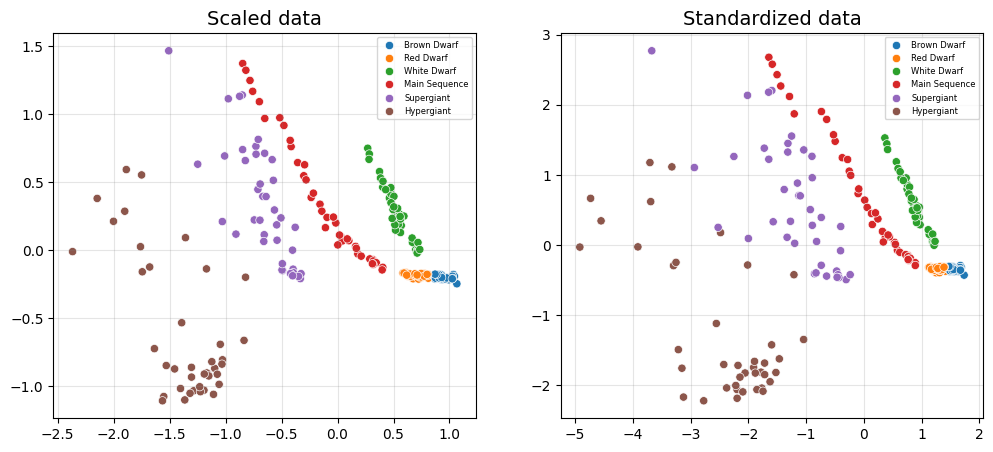

% of variance explained by each eigenvalue:

	Scaled data	Standardized data
1° 	63.8% 		60.4% 
2° 	21.4% 		23.5% 
3° 	8.4% 		9.3% 
4° 	6.4% 		6.8% 


In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x = scaled_components[:,0], y = scaled_components[:,1], hue=labels, ax=ax[0])
ax[0].set_title('Scaled data', fontsize = 14)
ax[0].grid(c='grey', alpha = 0.2)
ax[0].legend(fontsize=6)

sns.scatterplot(x = std_components[:,0], y = std_components[:,1], hue=labels, ax=ax[1])
ax[1].set_title('Standardized data', fontsize = 14)
ax[1].grid(c='grey', alpha = 0.2)
ax[1].legend(fontsize=6)

plt.show()

print('% of variance explained by each eigenvalue:\n')
print('\tScaled data\tStandardized data')
for i, sc, st in zip(np.arange(len(evals_scaled)), evals_scaled, evals_std):
    print("%i° \t%.1f%% \t\t%.1f%% " % (i+1, sc*100, st*100))


As shown in this summary, for the scaled data the first component explains more variance than for the standardized data. This is particularly visible for the super- and hypergiants, where the y axis is roughly the same for both plots, while the values on the x axis are different; as a consequence, for the standardized data, the limit between super- and hypergiants is less defined. 

I suspect this is because standardizing the data forces each dimension to have the same variance, while simply scaling them gives different variances for each dimension; this influences the PCA results. 


## Supervised classification


In [27]:
# Getting the targets:
y = np.array(X[:, 4], dtype = int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's use a random forest to classify the dataset.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, random_state=336)

rand_for = RandomForestClassifier(max_depth = 10, criterion = 'entropy', random_state = 336, n_jobs = -1)
rand_for.fit(X_train, y_train)
y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)
y_prob = rand_for.predict_proba(X_test)[:, 1]

print('Non-preprocessed dataset, 50%-50% train-test split, max_depth = 10:\n')
print('Accuracy for the train set: ' + str(accuracy_score(y_train, y_train_pred)))
print('Confusion matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('\nAccuracy for the test set: ' + str(accuracy_score(y_test, y_test_pred)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_test_pred))

Non-preprocessed dataset, 50%-50% train-test split, max_depth = 10:

Accuracy for the train set: 1.0
Confusion matrix:
[[17  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 23]]

Accuracy for the test set: 1.0
Confusion matrix:
[[23  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0 23  0  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 17]]


Well, perfect! Let's see how much we can decrease the train dataset size:

In [56]:
test_size = np.arange(0.6, 1., 0.05)
train_acc_init = []
test_acc_init = []

for te_s in test_size: 
    
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=te_s, random_state=336)
    
    rand_for = RandomForestClassifier(max_depth = 10, criterion = 'entropy', random_state = 336, n_jobs = -1)
    rand_for.fit(X_train, y_train)
    y_train_pred = rand_for.predict(X_train)
    y_test_pred = rand_for.predict(X_test)

    train_acc_init.append(accuracy_score(y_train, y_train_pred))
    test_acc_init.append(accuracy_score(y_test, y_test_pred))

print('Test size\tTrain acc\tTest acc')

for te_s, tr_acc, te_acc in zip(test_size, train_acc_init, test_acc_init):
    print(str(round(te_s, 2)) + '\t\t' + str(round(tr_acc, 2)) + '\t\t' + str(round(te_acc, 2)))

Test size	Train acc	Test acc
0.6		1.0		1.0
0.65		1.0		0.99
0.7		1.0		0.99
0.75		1.0		0.97
0.8		1.0		0.97
0.85		1.0		0.98
0.9		1.0		0.78
0.95		1.0		0.62


So, without preprocessing and with max_depth = 10, we can achieve an accuracy = $1$ up until a test size of $\sim60\%$, while the train set accuracy is always = $1$.

Let's see what happens by scaling the data first:

In [67]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

train_acc_sca = []
test_acc_sca = []

for te_s in test_size: 
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=te_s, random_state=336)
    
    rand_for = RandomForestClassifier(max_depth = 10, criterion = 'entropy', random_state = 336, n_jobs = -1)
    rand_for.fit(X_train, y_train)
    y_train_pred = rand_for.predict(X_train)
    y_test_pred = rand_for.predict(X_test)

    train_acc_sca.append(accuracy_score(y_train, y_train_pred))
    test_acc_sca.append(accuracy_score(y_test, y_test_pred))

print('Accuracies:')
print('Test size\tTrain (init)\tTrain (scaled)\tTest (init)\tTest (scaled)')

for te_s, tr_acc_i, tr_acc_s, te_acc_i, te_acc_s in zip(test_size, train_acc_init, train_acc_sca, test_acc_init, test_acc_sca):
    print(str(round(te_s, 2)) + '\t\t' + str(round(tr_acc_i, 2)) + '\t\t' + str(round(tr_acc_s, 2))+ '\t\t' + str(round(te_acc_i, 2))+ '\t\t' + str(round(te_acc_s, 2)))

Accuracies:
Test size	Train (init)	Train (scaled)	Test (init)	Test (scaled)
0.6		1.0		1.0		1.0		1.0
0.65		1.0		1.0		0.99		0.99
0.7		1.0		1.0		0.99		1.0
0.75		1.0		1.0		0.97		0.97
0.8		1.0		1.0		0.97		0.98
0.85		1.0		1.0		0.98		0.98
0.9		1.0		1.0		0.78		0.8
0.95		1.0		1.0		0.62		0.63


This is slightly better. Let's try with standardizing the dataset first:

In [66]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

train_acc_std = []
test_acc_std = []

for te_s in test_size: 
    
    X_train, X_test, y_train, y_test = train_test_split(std_data, y, test_size=te_s, random_state=336)
    
    rand_for = RandomForestClassifier(max_depth = 10, criterion = 'entropy', random_state = 336, n_jobs = -1)
    rand_for.fit(X_train, y_train)
    y_train_pred = rand_for.predict(X_train)
    y_test_pred = rand_for.predict(X_test)

    train_acc_std.append(accuracy_score(y_train, y_train_pred))
    test_acc_std.append(accuracy_score(y_test, y_test_pred))

print('Accuracies:')
print('Test size\tTrain (init)\tTrain (scaled)\tTrain (std)\tTest (init)\tTest (scaled)\tTest (std)')

for te_si, tr_i, tr_s, tr_st, te_i, te_s, te_st in zip(test_size, train_acc_init, train_acc_sca, train_acc_std, test_acc_init, test_acc_sca, test_acc_std):
    print(str(round(te_si, 2)) + '\t\t' + str(round(tr_i, 2)) + '\t\t' + str(round(tr_s, 2)) + '\t\t' + str(round(tr_st, 2))+ '\t\t' + str(round(te_i, 2)) + '\t\t' + str(round(te_s, 2)) + '\t\t' + str(round(te_st, 2)))

Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		1.0		1.0		1.0
0.65		1.0		1.0		1.0		0.99		0.99		0.99
0.7		1.0		1.0		1.0		0.99		1.0		1.0
0.75		1.0		1.0		1.0		0.97		0.97		0.97
0.8		1.0		1.0		1.0		0.97		0.98		0.98
0.85		1.0		1.0		1.0		0.98		0.98		0.98
0.9		1.0		1.0		1.0		0.78		0.8		0.8
0.95		1.0		1.0		1.0		0.62		0.63		0.63


So, scaling and standardizing the dataset in this case have the same result.

We can try to increase max_depth:

In [74]:
def print_results(max_depth, data, y):

    test_size = np.arange(0.6, 1., 0.05)

    # Without preprocessing:
    
    train_acc_init = []
    test_acc_init = []
    
    for te_s in test_size: 
        
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=te_s, random_state=336)
        
        rand_for = RandomForestClassifier(max_depth = max_depth, criterion = 'entropy', random_state = 336, n_jobs = -1)
        rand_for.fit(X_train, y_train)
        y_train_pred = rand_for.predict(X_train)
        y_test_pred = rand_for.predict(X_test)

        train_acc_init.append(accuracy_score(y_train, y_train_pred))
        test_acc_init.append(accuracy_score(y_test, y_test_pred))

    # Scaling:

    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(data)
    
    train_acc_sca = []
    test_acc_sca = []
    
    for te_s in test_size: 
        
        X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=te_s, random_state=336)
        
        rand_for = RandomForestClassifier(max_depth = max_depth, criterion = 'entropy', random_state = 336, n_jobs = -1)
        rand_for.fit(X_train, y_train)
        y_train_pred = rand_for.predict(X_train)
        y_test_pred = rand_for.predict(X_test)
    
        train_acc_sca.append(accuracy_score(y_train, y_train_pred))
        test_acc_sca.append(accuracy_score(y_test, y_test_pred))

    # Standardizing:

    scaler = StandardScaler()
    std_data = scaler.fit_transform(data)
    
    train_acc_std = []
    test_acc_std = []
    
    for te_s in test_size: 
        
        X_train, X_test, y_train, y_test = train_test_split(std_data, y, test_size=te_s, random_state=336)
        
        rand_for = RandomForestClassifier(max_depth = max_depth, criterion = 'entropy', random_state = 336, n_jobs = -1)
        rand_for.fit(X_train, y_train)
        y_train_pred = rand_for.predict(X_train)
        y_test_pred = rand_for.predict(X_test)
    
        train_acc_std.append(accuracy_score(y_train, y_train_pred))
        test_acc_std.append(accuracy_score(y_test, y_test_pred))

    print('Accuracies:')
    print('Test size\tTrain (init)\tTrain (scaled)\tTrain (std)\tTest (init)\tTest (scaled)\tTest (std)')
    
    for te_si, tr_i, tr_s, tr_st, te_i, te_s, te_st in zip(test_size, train_acc_init, train_acc_sca, train_acc_std, test_acc_init, test_acc_sca, test_acc_std):
        print(str(round(te_si, 2)) + '\t\t' + str(round(tr_i, 2)) + '\t\t' + str(round(tr_s, 2)) + '\t\t' + str(round(tr_st, 2))+ '\t\t' + str(round(te_i, 2)) + '\t\t' + str(round(te_s, 2)) + '\t\t' + str(round(te_st, 2)))

In [79]:
print('MAX_DEPTH = 15:')
print_results(15, data, y)

print('\nMAX_DEPTH = 20:')
print_results(20, data, y)

print('\nMAX_DEPTH = 25:')
print_results(25, data, y)

print('\nMAX_DEPTH = 30:')
print_results(30, data, y)

print('\nMAX_DEPTH = 35:')
print_results(35, data, y)

MAX_DEPTH = 15:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		1.0		1.0		1.0
0.65		1.0		1.0		1.0		0.99		0.99		0.99
0.7		1.0		1.0		1.0		0.99		1.0		1.0
0.75		1.0		1.0		1.0		0.97		0.97		0.97
0.8		1.0		1.0		1.0		0.97		0.98		0.98
0.85		1.0		1.0		1.0		0.98		0.98		0.98
0.9		1.0		1.0		1.0		0.78		0.8		0.8
0.95		1.0		1.0		1.0		0.62		0.63		0.63

MAX_DEPTH = 20:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		1.0		1.0		1.0
0.65		1.0		1.0		1.0		0.99		0.99		0.99
0.7		1.0		1.0		1.0		0.99		1.0		1.0
0.75		1.0		1.0		1.0		0.97		0.97		0.97
0.8		1.0		1.0		1.0		0.97		0.98		0.98
0.85		1.0		1.0		1.0		0.98		0.98		0.98
0.9		1.0		1.0		1.0		0.78		0.8		0.8
0.95		1.0		1.0		1.0		0.62		0.63		0.63

MAX_DEPTH = 25:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		1.0		1.0		1.0
0.65		1.0		1.0		1.0		0.99		0.99		

So, increasing the max_depth doesn't change the results. If we decrease it, though:

In [84]:
print('MAX_DEPTH = 1:')
print_results(1, data, y)

print('MAX_DEPTH = 2:')
print_results(2, data, y)

print('\nMAX_DEPTH = 3:')
print_results(3, data, y)

print('\nMAX_DEPTH = 4:')
print_results(4, data, y)

MAX_DEPTH = 1:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		0.36		0.36		0.36		0.31		0.31		0.31
0.65		0.36		0.36		0.36		0.32		0.32		0.32
0.7		0.39		0.39		0.39		0.31		0.31		0.31
0.75		0.42		0.42		0.42		0.3		0.3		0.3
0.8		0.4		0.4		0.4		0.32		0.32		0.32
0.85		0.6		0.6		0.6		0.48		0.48		0.48
0.9		0.78		0.78		0.78		0.47		0.47		0.47
0.95		0.73		0.73		0.73		0.31		0.31		0.31
MAX_DEPTH = 2:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		0.99		0.99		0.99
0.65		1.0		1.0		1.0		0.99		0.99		0.99
0.7		1.0		1.0		1.0		0.99		0.99		0.99
0.75		1.0		0.98		0.98		0.97		0.97		0.97
0.8		1.0		1.0		1.0		0.98		0.98		0.98
0.85		0.97		0.97		0.97		0.97		0.97		0.98
0.9		1.0		1.0		1.0		0.77		0.77		0.77
0.95		1.0		1.0		1.0		0.57		0.58		0.58

MAX_DEPTH = 3:
Accuracies:
Test size	Train (init)	Train (scaled)	Train (std)	Test (init)	Test (scaled)	Test (std)
0.6		1.0		1.0		1.0		0.99		0.99		0.99


This tells us that, to obtain a $99\%$ accuracy on the test set, is enough to have:

- Test size = 65%
- Max_depth = 4
- Preprocessing the data or not doesn't make a difference.

To obtain an accuracy of more than $95\%$, instead, we can set the test size up to $85\%$. This is a great performance!